<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_6)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.6_n20.csv',
 'data_add_delta_-3.6_n30.csv',
 'data_add_delta_-3.6_n60.csv',
 'data_add_delta_-3.6_n120.csv',
 'data_add_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.6_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.244474,71.683663,49.203093,-0.000129,186.131102,186.131185,-0.000083
1,0.0,1.0,92.449461,46.867294,36.140696,-0.000575,185.456877,185.457112,-0.000236
2,0.0,2.0,33.758843,83.426636,94.252723,-0.000183,221.438018,221.438436,-0.000418
3,0.0,3.0,78.475237,90.734668,91.354182,-0.000012,270.564075,270.564133,-0.000057
4,0.0,4.0,86.007792,36.409882,78.824412,-0.002610,211.239475,211.241876,-0.002402
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,26.442424,77.324454,40.768469,-0.000362,154.534983,154.535283,-0.000300
119996,999.0,116.0,64.631774,31.561878,35.740263,0.004671,141.938587,141.934314,0.004272
119997,999.0,117.0,92.917875,93.838100,70.918143,-0.000319,267.673799,267.674184,-0.000385
119998,999.0,118.0,47.181659,30.964434,26.863902,-0.000041,115.009954,115.010348,-0.000395


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.244474,71.683663,49.203093,-0.000129,186.131102,186.131185,-0.000083
1,0.0,1.0,92.449461,46.867294,36.140696,-0.000575,185.456877,185.457112,-0.000236
2,0.0,2.0,33.758843,83.426636,94.252723,-0.000183,221.438018,221.438436,-0.000418
3,0.0,3.0,78.475237,90.734668,91.354182,-0.000012,270.564075,270.564133,-0.000057
4,0.0,4.0,86.007792,36.409882,78.824412,-0.002610,211.239475,211.241876,-0.002402
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,26.442424,77.324454,40.768469,-0.000362,154.534983,154.535283,-0.000300
119996,999.0,116.0,64.631774,31.561878,35.740263,0.004671,141.938587,141.934314,0.004272
119997,999.0,117.0,92.917875,93.838100,70.918143,-0.000319,267.673799,267.674184,-0.000385
119998,999.0,118.0,47.181659,30.964434,26.863902,-0.000041,115.009954,115.010348,-0.000395


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    55.244474  71.683663  49.203093 -0.000129  186.131102   
      1.0    92.449461  46.867294  36.140696 -0.000575  185.456877   
      2.0    33.758843  83.426636  94.252723 -0.000183  221.438018   
      3.0    78.475237  90.734668  91.354182 -0.000012  270.564075   
      4.0    86.007792  36.409882  78.824412 -0.002610  211.239475   
...                ...        ...        ...       ...         ...   
999.0 115.0  26.442424  77.324454  40.768469 -0.000362  154.534983   
      116.0  64.631774  31.561878  35.740263  0.004671  141.938587   
      117.0  92.917875  93.838100  70.918143 -0.000319  267.673799   
      118.0  47.181659  30.964434  26.863902 -0.000041  115.009954   
      119.0  38.740752  92.731045  83.238007 -0.000089  224.709714   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.131185 -0.000083  
      1.0    185.457112 -0.000236  
      2.0    221.438436 -0.000418  
      3.0    270.564133 -0.000057  
      4.0    211.241876 -0.002402  
...                 ...       ...  
999.0 115.0  154.535283 -0.000300  
      116.0  141.934314  0.004272  
      117.0  267.674184 -0.000385  
      118.0  115.010348 -0.000395  
      119.0  224.709488  0.000227  

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    55.244474  71.683663  49.203093 -0.000129  186.131102   
      1.0    92.449461  46.867294  36.140696 -0.000575  185.456877   
      2.0    33.758843  83.426636  94.252723 -0.000183  221.438018   
      3.0    78.475237  90.734668  91.354182 -0.000012  270.564075   
      4.0    86.007792  36.409882  78.824412 -0.002610  211.239475   
...                ...        ...        ...       ...         ...   
999.0 115.0  26.442424  77.324454  40.768469 -0.000362  154.534983   
      116.0  64.631774  31.561878  35.740263  0.004671  141.938587   
      117.0  92.917875  93.838100  70.918143 -0.000319  267.673799   
      118.0  47.181659  30.964434  26.863902 -0.000041  115.009954   
      119.0  38.740752  92.731045  83.238007 -0.000089  224.709714   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.131185 -0.000083  
      1.0    185.457112 -0.000236  
      2.0    221.438436 -0.000418  
      3.0    270.564133 -0.000057  
      4.0    211.241876 -0.002402  
...                 ...       ...  
999.0 115.0  154.535283 -0.000300  
      116.0  141.934314  0.004272  
      117.0  267.674184 -0.000385  
      118.0  115.010348 -0.000395  
      119.0  224.709488  0.000227  

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.244474,71.683663,49.203093,-0.000129,186.131102,186.131185,-0.000083
1,0.0,1.0,92.449461,46.867294,36.140696,-0.000575,185.456877,185.457112,-0.000236
2,0.0,2.0,33.758843,83.426636,94.252723,-0.000183,221.438018,221.438436,-0.000418
3,0.0,3.0,78.475237,90.734668,91.354182,-0.000012,270.564075,270.564133,-0.000057
4,0.0,4.0,86.007792,36.409882,78.824412,-0.002610,211.239475,211.241876,-0.002402
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,26.442424,77.324454,40.768469,-0.000362,154.534983,154.535283,-0.000300
119996,999.0,116.0,64.631774,31.561878,35.740263,0.004671,141.938587,141.934314,0.004272
119997,999.0,117.0,92.917875,93.838100,70.918143,-0.000319,267.673799,267.674184,-0.000385
119998,999.0,118.0,47.181659,30.964434,26.863902,-0.000041,115.009954,115.010348,-0.000395


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    55.244474  71.683663  49.203093 -0.000129  186.131102   
      1.0    92.449461  46.867294  36.140696 -0.000575  185.456877   
      2.0    33.758843  83.426636  94.252723 -0.000183  221.438018   
      3.0    78.475237  90.734668  91.354182 -0.000012  270.564075   
      4.0    86.007792  36.409882  78.824412 -0.002610  211.239475   
...                ...        ...        ...       ...         ...   
999.0 115.0  26.442424  77.324454  40.768469 -0.000362  154.534983   
      116.0  64.631774  31.561878  35.740263  0.004671  141.938587   
      117.0  92.917875  93.838100  70.918143 -0.000319  267.673799   
      118.0  47.181659  30.964434  26.863902 -0.000041  115.009954   
      119.0  38.740752  92.731045  83.238007 -0.000089  224.709714   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    186.131185 -0.000083  
      1.0    185.457112 -0.000236  
      2.0    221.438436 -0.000418  
      3.0    270.564133 -0.000057  
      4.0    211.241876 -0.002402  
...                 ...       ...  
999.0 115.0  154.535283 -0.000300  
      116.0  141.934314  0.004272  
      117.0  267.674184 -0.000385  
      118.0  115.010348 -0.000395  
      119.0  224.709488  0.000227  

[120000 rows x 7 columns]

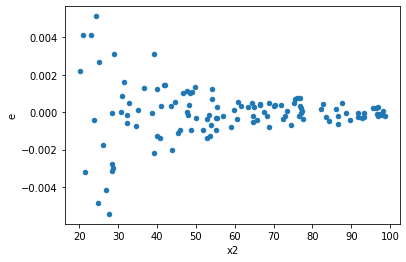

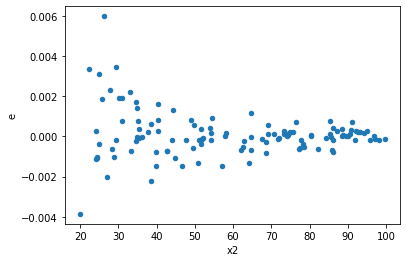

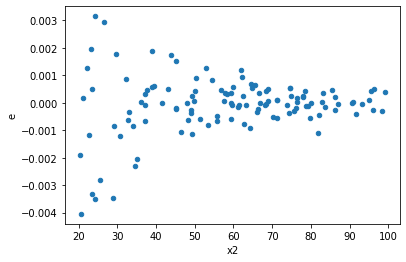

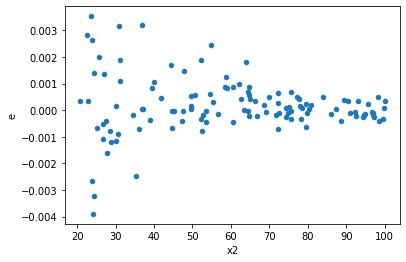

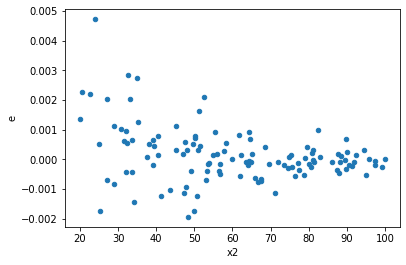

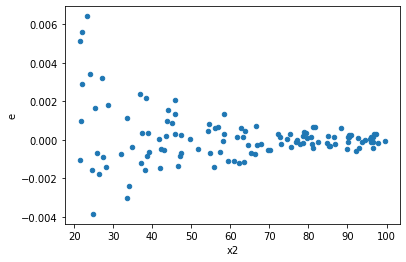

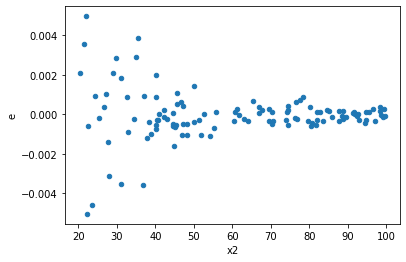

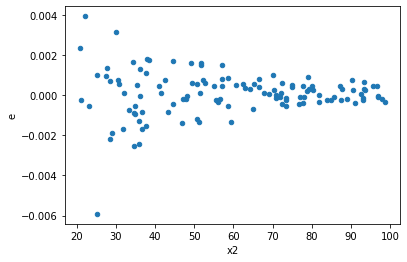

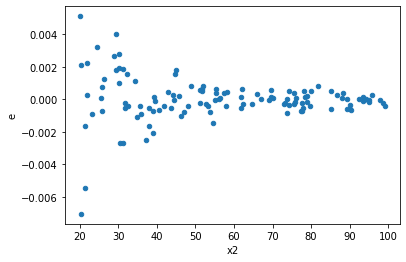

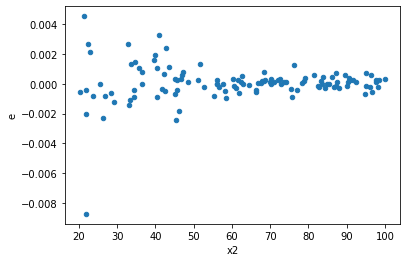

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.00016838661976830376,5.487421306150518e-06,3.7419248837400835e-06,1.2194269569223373e-07,0.03258822650933363,3.659759371922994e-22,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.00012863751494226664,5.681388960643821e-06,2.858611443161481e-06,1.2625308801430714e-07,0.04416587931750443,2.1169756745053507e-19,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.00014857810479764944,7.877006521887234e-06,3.3017356621699877e-06,1.7504458937527187e-07,0.05301593079690333,8.969644541148393e-18,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.00017293513507376287,6.036272637714619e-06,3.843003001639175e-06,1.3413939194921376e-07,0.03490483663218546,1.5582388550103253e-21,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.00017711776649112151,4.461787236832623e-06,3.935950366469367e-06,9.91508274851694e-08,0.025191076678670075,1.520604901583182e-24,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,9.11962982222722e-05,5.796426494874084e-06,2.026584404939382e-06,1.288094776638685e-07,0.06355988793258349,3.4613442264459836e-16,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,9.941616351994938e-05,6.906466348079912e-06,2.2092480782210973e-06,1.5347702995733137e-07,0.06947025617915766,2.0168523398853264e-15,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.00013950630255972544,6.917719622991234e-06,3.1001400568827877e-06,1.5372710273313852e-07,0.04958714764897176,2.2926775939675903e-18,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.0001634228799794967,6.739460407285817e-06,3.6316195550999266e-06,1.4976578682857373e-07,0.041239393211840114,5.1076072256444304e-20,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64